In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('churn_prediction.csv')
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes == 'int64']
data.dtypes[data.dtypes == 'float64']
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

In [19]:
date = pd.DatetimeIndex(data['last_transaction'])
data['doy_ls_tran'] = date.dayofyear
data['woy_ls_tran'] = date.weekofyear
data['moy_ls_tran'] = date.month
data['dow_ls_tran'] = date.dayofweek
data = data.drop(columns = ['last_transaction'])

<ipython-input-19-986bccc0aac4>:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['woy_ls_tran'] = date.weekofyear


In [20]:
def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

In [31]:
i="current_balance"
quant25 = data[i].quantile(0.25)
quant75 = data[i].quantile(0.75)
IQR = quant75 - quant25
med = data[i].median()
whis_low = quant25-(1.5*IQR)
whis_high = quant75+(1.5*IQR)
print(whis_low,whis_high)
outlier_high = len(data[i][data[i]>whis_high])
outlier_low = len(data[i][data[i]<whis_low])
print(outlier_high,outlier_low)

-5492.554999999999 13912.845
2738 1


5     15202.20
25    14289.26
26    20273.43
53    21252.86
67    15942.78
Name: current_balance, dtype: float64
5     13913.845
25    13913.845
26    13913.845
53    13913.845
67    13913.845
Name: current_balance, dtype: float64


C:\Users\anime\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='current_balance'>

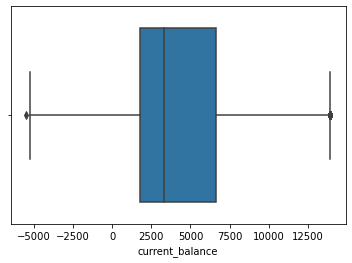

In [53]:
i="current_balance"

quant25 = data[i].quantile(0.25)
quant75 = data[i].quantile(0.75)
IQR = quant75 - quant25
med = data[i].median()
whis_low = quant25-(1.5*IQR)
whis_high = quant75+(1.5*IQR)
outlier_high = len(data[i][data[i]>whis_high])
outlier_low = len(data[i][data[i]<whis_low])

data2 = pd.DataFrame(data[i])
print(data2[i][data2[i]>whis_high].head())
data2[i][data2[i]>whis_high] = whis_high+1
print(data2[i][data2[i]>whis_high].head())
data2[i][data2[i]<whis_low] = whis_low-1

sns.boxplot(data2[i], orient="h")

In [54]:
population = data['vintage']

In [55]:
population = pd.DataFrame(population)

array([[<AxesSubplot:title={'center':'vintage'}>]], dtype=object)

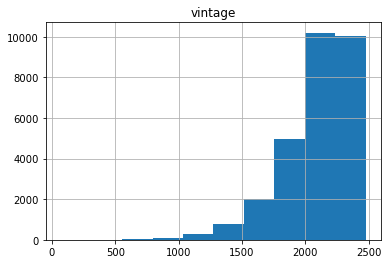

In [56]:
population.hist(bins=10)

In [61]:
sampled_means = []
for i in range(0,1000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sampled_means.append(population.sample(n=100).mean().values[0])

In [60]:
population.sample(n=100).mean().values[0]

2078.28

In [66]:
sampled_means

[2101.24,
 2164.03,
 2103.88,
 2082.43,
 2054.64,
 2099.8,
 2056.45,
 2098.94,
 2100.09,
 2119.68,
 2094.36,
 2082.89,
 2092.11,
 2129.1,
 2104.32,
 2084.08,
 2060.91,
 2065.77,
 2031.95,
 2050.29,
 2095.85,
 2071.56,
 2106.44,
 2070.02,
 2091.53,
 2092.79,
 2103.76,
 2061.74,
 2114.31,
 2093.76,
 2063.6,
 2082.89,
 2095.8,
 2098.86,
 2173.53,
 2089.03,
 2115.88,
 2085.08,
 2093.35,
 2128.32,
 2066.58,
 2095.0,
 2021.53,
 2106.48,
 2085.63,
 2047.89,
 2115.29,
 2102.58,
 2073.26,
 2086.99,
 2093.23,
 2076.78,
 2135.87,
 2079.17,
 2088.63,
 2052.54,
 2054.54,
 2086.94,
 2109.42,
 2086.34,
 2122.4,
 2084.53,
 2065.04,
 2050.31,
 2130.34,
 2119.56,
 2086.56,
 2106.08,
 2084.04,
 2113.71,
 2083.92,
 2124.67,
 2102.26,
 2085.26,
 2060.1,
 2086.89,
 2091.21,
 2072.5,
 2093.6,
 2114.75,
 2111.25,
 2058.0,
 2120.81,
 2136.77,
 2124.27,
 2021.11,
 2097.5,
 2132.91,
 2111.37,
 2090.75,
 2113.31,
 2113.87,
 2103.66,
 2075.17,
 2094.73,
 2089.81,
 2114.45,
 2111.74,
 2100.66,
 2124.86,
 2107.56,
 

(array([  4.,  12.,  31., 117., 196., 268., 208., 120.,  38.,   6.]),
 array([1992.95 , 2011.008, 2029.066, 2047.124, 2065.182, 2083.24 ,
        2101.298, 2119.356, 2137.414, 2155.472, 2173.53 ]),
 <BarContainer object of 10 artists>)

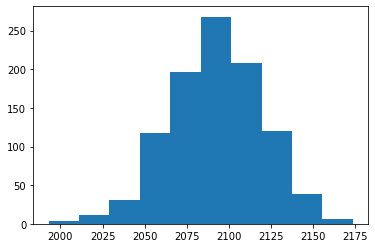

In [67]:
plt.hist(sampled_means)

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

df = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

df['day_of_week'] = df['pickup_datetime'].dt.weekday
df['hour_of_day'] = df['pickup_datetime'].dt.hour

df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df.drop(["id","pickup_datetime","dropoff_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","store_and_fwd_flag"],axis=1,inplace=True)
df.head()




from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(df, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]


In [6]:
train.head()

,vendor_id,passenger_count,trip_duration,day_of_week,hour_of_day
78016,2,2,2160,4,23
38313,1,1,295,3,9
206534,2,1,237,5,15
564809,2,1,717,1,16
100394,2,3,1076,0,22


In [7]:
test.head()

,vendor_id,passenger_count,trip_duration,day_of_week,hour_of_day
544645,2,1,441,5,12
307528,1,1,1088,1,20
159533,1,1,1054,1,11
246485,2,1,1831,6,1
342223,1,1,289,5,9


In [8]:
test['simple_mean'] = train['trip_duration'].mean()

In [10]:
#calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error = MAE(test['trip_duration'] , test['simple_mean'])
simple_mean_error

620.3379389183658

In [11]:
#Mean trip_duration with respect to vendor_id
vendor_type = pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)
vendor_type

,trip_duration
vendor_id,
1,826.698685
2,1044.433545


In [14]:
# initializing new column to zero
test['vendor_type_mean'] = 0

# For every unique entry 
for i in train['vendor_id'].unique():
  # Assign the mean value corresponding to unique entry
  test['vendor_type_mean'][test['vendor_id'] == int(i)] = train['trip_duration'][train['vendor_id'] == int(i)].mean()

In [15]:
test['vendor_type_mean']

544645    1044.433545
307528     826.698685
159533     826.698685
246485    1044.433545
342223     826.698685
             ...     
260312    1044.433545
367442     826.698685
132495    1044.433545
674069    1044.433545
122481     826.698685
Name: vendor_type_mean, Length: 174943, dtype: float64

In [17]:
vendor_type_error = MAE(test['trip_duration'] , test['vendor_type_mean'] )
vendor_type_error

625.8503826356223

In [18]:
#Mean trip_duration with respect to passenger_count
passenger_count_type = pd.pivot_table(train, values='trip_duration', index = ['passenger_count'], aggfunc=np.mean)
passenger_count_type

# initializing new column to zero
test['passenger_count_type_mean'] = 0
# For every unique entry 
for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['passenger_count_type_mean'][test['passenger_count'] == int(i)] = train['trip_duration'][train['passenger_count'] == int(i)].mean()
passenger_count_type_error = MAE(test['trip_duration'] , test['passenger_count_type_mean'] )
passenger_count_type_error

620.8709624184388

In [20]:
#Mean trip_duration with respect to day_of_week
day_of_week_type = pd.pivot_table(train, values='trip_duration', index = ['day_of_week'], aggfunc=np.mean)
day_of_week_type

# initializing new column to zero
test['day_of_week_type_mean'] = 0
# For every unique entry 
for i in train['day_of_week'].unique():
  # Assign the mean value corresponding to unique entry
  test['day_of_week_type_mean'][test['day_of_week'] == int(i)] = train['trip_duration'][train['day_of_week'] == int(i)].mean()
day_of_week_type_error = MAE(test['trip_duration'] , test['day_of_week_type_mean'] )
day_of_week_type_error

619.0055843100433

In [21]:
#Mean trip_duration with respect to hour_of_day
hour_of_day_type = pd.pivot_table(train, values='trip_duration', index = ['hour_of_day'], aggfunc=np.mean)
hour_of_day_type

# initializing new column to zero
test['hour_of_day_type_mean'] = 0
# For every unique entry 
for i in train['hour_of_day'].unique():
  # Assign the mean value corresponding to unique entry
  test['hour_of_day_type_mean'][test['hour_of_day'] == int(i)] = train['trip_duration'][train['hour_of_day'] == int(i)].mean()
hour_of_day_type_error = MAE(test['trip_duration'] , test['hour_of_day_type_mean'] )
hour_of_day_type_error

618.366859823513